# Домашняя работа №1
## ИАД1. Лайко Рудольф. ДЗ1
Майнор по анализу данных 2016

<hr\>
**Общая информация**

**Жесткий срок сдачи:** 30 сентября 2016, 23:59 <br\>

При отправлении ДЗ на почту указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде: <br\>
** [Майнор ИАД 2016] *{Фамилия}* *{Имя}* ДЗ*{Номер}* **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

# Table of Contents
 <p><div class="lev1 toc-item"><a data-toc-modified-id="Домашняя-работа-№1-1" href="#Домашняя-работа-№1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Домашняя работа №1</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Регрессия-с-SVM-(3-балла)-2" href="#Регрессия-с-SVM-(3-балла)"><span class="toc-item-num">2&nbsp;&nbsp;</span>Регрессия с SVM (3 балла)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Визуализация-данных-(1-балл)-2.1" href="#Визуализация-данных-(1-балл)"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Визуализация данных (1 балл)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Обучение-моделей-(2-балла)-2.2" href="#Обучение-моделей-(2-балла)"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение моделей (2 балла)</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Определение-языка-слова-(7-баллов)-3" href="#Определение-языка-слова-(7-баллов)"><span class="toc-item-num">3&nbsp;&nbsp;</span>Определение языка слова (7 баллов)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Загрузка-(1-балл)-3.1" href="#Загрузка-(1-балл)"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Загрузка (1 балл)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Подготовка-данных-(2-балла)-3.2" href="#Подготовка-данных-(2-балла)"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подготовка данных (2 балла)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Расчет-ядра-(3-балла)-3.3" href="#Расчет-ядра-(3-балла)"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Расчет ядра (3 балла)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Оценка-качества-(1-балл)-3.4" href="#Оценка-качества-(1-балл)"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Оценка качества (1 балл)</a></div>

<hr\>

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot')
%matplotlib inline

# Регрессия с SVM (3 балла)

Неудивительно, что принципы SVM так же прекрасно ложатся на задачу регрессии.

Загрузите набор данных из *titanium.csv*<br/>
Мы будем решать задачу восстановления столбца 'y' по столбцу 'x'.

In [2]:
titanium = pd.read_csv("titanium.csv")
titan_data = titanium.x
titan_target = titanium.y
titanium.head()

,x,y
0,585.0,0.644
1,595.0,0.622
2,605.0,0.638
3,615.0,0.649
4,625.0,0.652


## Визуализация данных (1 балл)

Выполните стандартную предобработку данных и выведите их на графике.

* построим диаграмму рассеивания для точек (Х, Y)
* пользуясь параметром bins функции hist() со значением количества принимаемых величиной X значением, посмотрим на то, сколько раз встречается каждое значение
* аналогично для Y

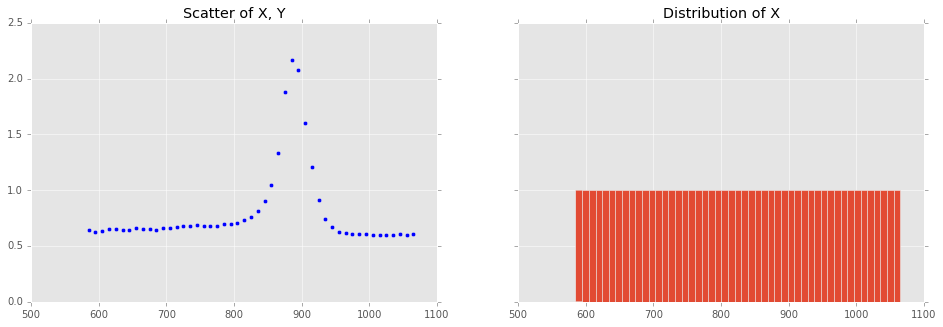

In [3]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(16, 5))
ax1.scatter(titan_data, titan_target)
ax1.set_title("Scatter of X, Y")
ax2.hist(titan_data, bins = len(titan_data.unique()))
# unique() для совпадения кол-ва "корзин" и принимаемых значений
ax2.set_title("Distribution of X")

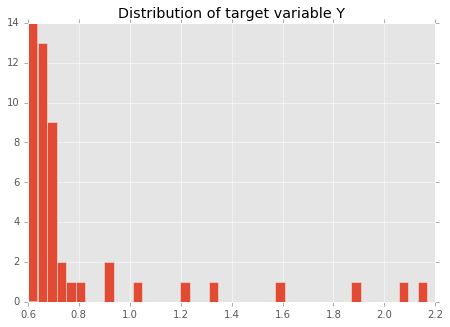

In [4]:
plt.figure(figsize=(7.3, 5))
plt.hist(titan_target, bins = len(titan_target.unique()))
plt.title("Distribution of target variable Y")

#### Масштабирование

* масштабирование признака Х никак не влияет на корреляцию с Y (было установлено эмпирически - построением такой же heatmap для случая без масштабирования)
* в то же время, существенно влияет на время работы моделей, что крайне актуально для подбора гипермпараметров кросс-валидацией

In [5]:
titan_data = StandardScaler().fit_transform(np.array(titan_data).reshape(-1,1))
titan_target = np.array(titan_target)

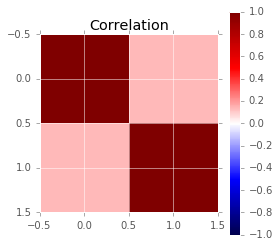

In [6]:
correlation_matrix = titanium.corr()
plt.figure(figsize = (4, 4))
plt.imshow(correlation_matrix, cmap='seismic', interpolation='nearest', vmin=-1, vmax=1, )
plt.colorbar()
plt.title("Correlation")


## Обучение моделей (2 балла)

Рассмотрите 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установить ширину трубки `epsilon=0.01`

Для каждого из ядер:
1. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наулучшего параметра $С$ постройте график с данными и предстазанием по svm

В каких случаях возникает эффекты недообучения, переобучения?

### Outline
* реализуем функцию train_SVR, которую будем вызывать для моделей SVR c разными ядрами и гиперпраметрами
* для ее универсальности определим аргументы по умолчанию, которые бы удовлетворяли каждой из модели
* для подбора гиперпараметра - штраф С, будем использовать 3-fold cv
* функция также будет выводить все результаты модели

In [7]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from matplotlib import markers
import matplotlib.lines as mlines

In [8]:
def train_SVR(data, target, kernel, gamma='auto', coef0=0.0, epsilon=0.01):
    
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state = 42)
    
    param_grid = {"C" : [ 10**j for j in np.arange(0, 5)]}
    #param_grid = {'kernel':('rbf','linear', 'sigmoid'),
    #'C':[1, 10,100,1000,10000],'degree':[1,2,3,4]}
    
    svr_grid = GridSearchCV(SVR(kernel=kernel, gamma=gamma, coef0=coef0, epsilon=epsilon), 
                            param_grid, cv = 3, verbose=5)
    
    svr_grid.fit(X_train, y_train)
    
    preds = svr_grid.best_estimator_.predict(X_test)
    
    print("MSE: ", mean_absolute_error(y_test, preds))
    plt.figure(figsize=(12, 6))
    plt.scatter(data, target, marker='o', label = "True")
    plt.scatter(X_test, preds, marker='s', label = "Predictions", color='yellow', s=50)
    plt.plot(data, svr_grid.best_estimator_.predict(data), label=kernel)
    plt.legend()
    plt.title(kernel + " model predictions")
    
    
    scores = [x[1] for x in svr_grid.grid_scores_]
    scores = np.array(scores).reshape(len(param_grid["C"]))
    
    plt.figure(figsize=(12, 6))
    plt.semilogx()
    plt.plot(param_grid["C"], scores)
    plt.xlabel('C')
    plt.ylabel('Score')
    
    plt.title("Score depending on C parameter with 3 folds")
    

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] C=1 .............................................................
[CV] ................................... C=1, score=-0.290871 -   0.0s
[CV] C=1 .............................................................
[CV] ................................... C=1, score=-0.132920 -   0.0s
[CV] C=1 .............................................................
[CV] ................................... C=1, score=-0.061041 -   0.0s
[CV] C=10 ............................................................
[CV] .................................. C=10, score=-0.290871 -   0.0s
[CV] C=10 ............................................................
[CV] .................................. C=10, score=-0.132921 -   0.0s
[CV] C=10 ............................................................
[CV] .................................. C=10, score=-0.061041 -   0.0s
[CV] C=100 ...........................................................
[CV] ............

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    3.5s finished


MSE:  0.163324387005


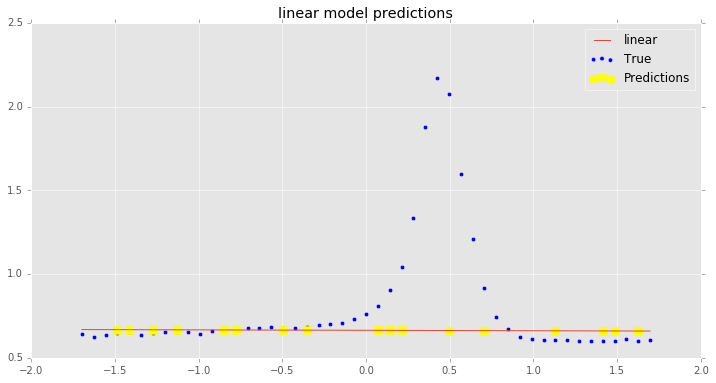

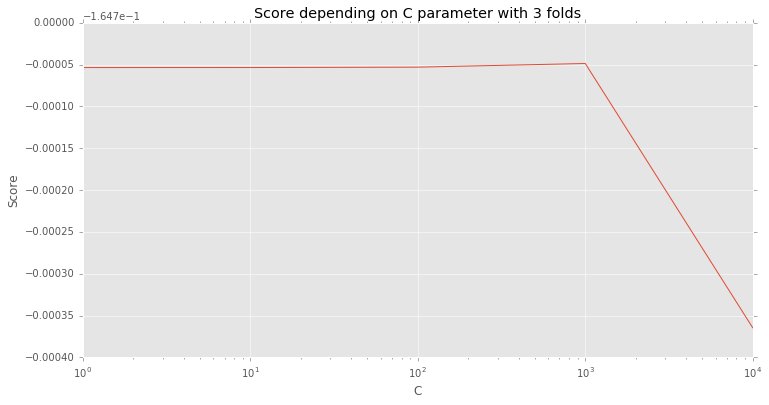

In [9]:
train_SVR(titan_data, titan_target, 'linear')

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] C=1 .............................................................
[CV] ................................... C=1, score=-0.234828 -   0.0s
[CV] C=1 .............................................................
[CV] .................................... C=1, score=0.072857 -   0.0s
[CV] C=1 .............................................................
[CV] .................................... C=1, score=0.129030 -   0.1s
[CV] C=10 ............................................................
[CV] .................................. C=10, score=-0.235420 -   0.4s
[CV] C=10 ............................................................
[CV] ................................... C=10, score=0.072746 -   0.2s
[CV] C=10 ............................................................
[CV] ................................... C=10, score=0.128829 -   1.0s
[CV] C=100 ...........................................................
[CV] ............

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  4.3min finished


MSE:  0.170288104491


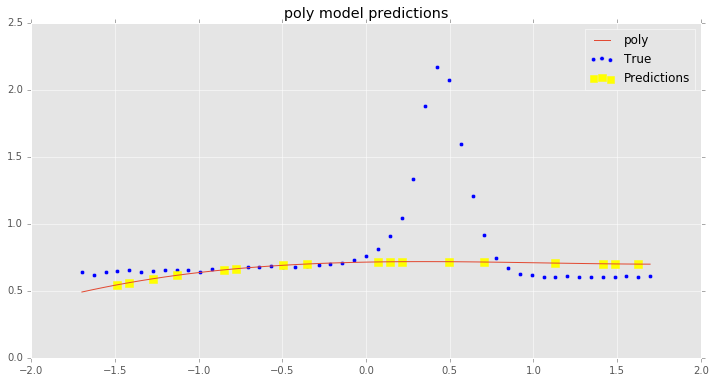

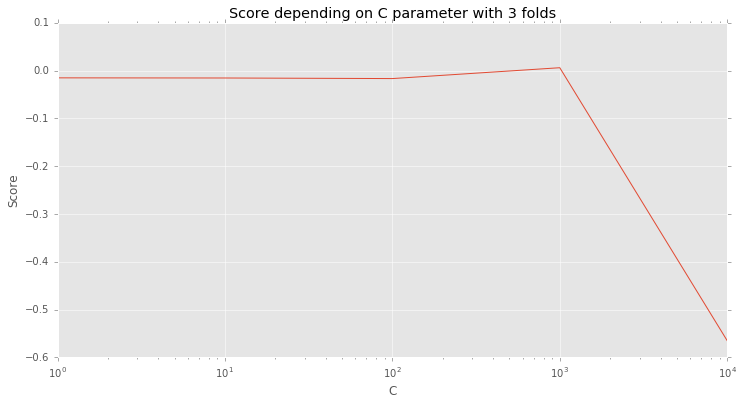

In [10]:
train_SVR(titan_data, titan_target, "poly", 6, 1)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] C=1 .............................................................
[CV] .................................... C=1, score=0.684817 -   0.0s
[CV] C=1 .............................................................
[CV] .................................... C=1, score=0.837115 -   0.0s
[CV] C=1 .............................................................
[CV] .................................... C=1, score=0.587921 -   0.0s
[CV] C=10 ............................................................
[CV] ................................... C=10, score=0.827331 -   0.0s
[CV] C=10 ............................................................
[CV] ................................... C=10, score=0.931342 -   0.0s
[CV] C=10 ............................................................
[CV] ................................... C=10, score=0.715507 -   0.0s
[CV] C=100 ...........................................................
[CV] ............

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.8s finished


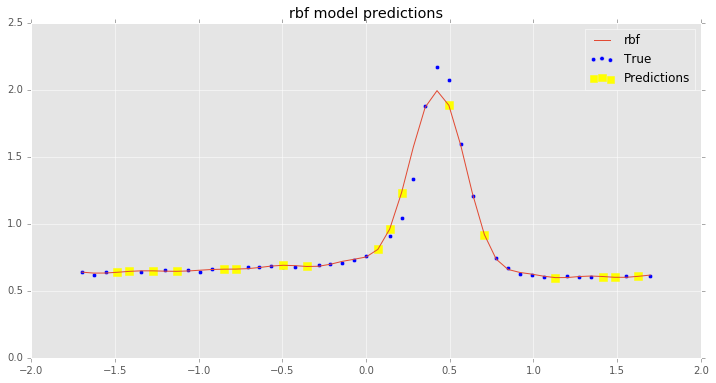

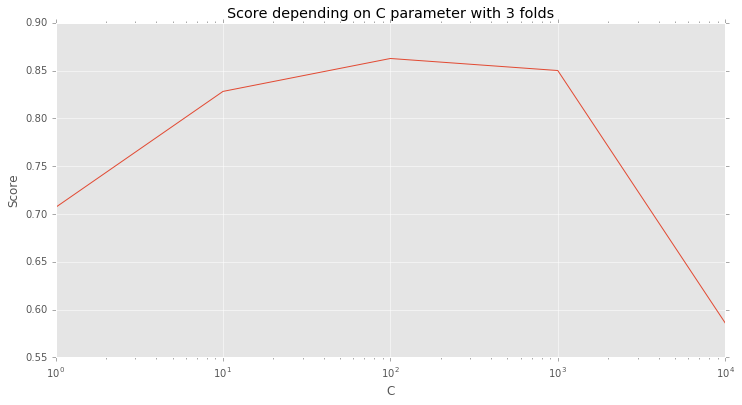

In [11]:
train_SVR(titan_data, titan_target, "rbf", 6, 1)

### Вывод

* в случае линейной и полиномильной моделей возникает эффект недообучения : это явно видно из графиков, соответсвующих предсказаниям (они проспускают "горб" и идут дальше по прямой)
* хоть и показатели ошибок моделей не имеют существенной разницы, при большом объеме выборки и дисперсии горба (его "ширина") эти две модели показали бы значительно худший результат
* в случае RBF ядра, если мы немного изменим параметры, уже будет переобучение

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Вам будет дано два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова. У слов нет общепринятого числового представления, поэтому мы предлагаем вам реализовать собственноге ядро для SVM, основанное на редакторском расстоянии или [расстоянии Левенштейна](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D1%88%D1%82%D0%B5%D0%B9%D0%BD%D0%B0). 

Имплементировать расстояние Леванштейна не нужно - можно взять любую доступную реализацию, например [здесь](https://github.com/toastdriven/pylev) или [здесь](https://github.com/ztane/python-Levenshtein).

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [12]:
wp_eng = pd.read_csv("w&p_eng.txt")
wp_eng["label"] = 0
wp_eng.tail()

,word,label
5039,leave,0
5040,her,0
5041,task,0
5042,was,0
5043,accomplished,0


In [13]:
wp_es = pd.read_csv("w&p_es.txt")
wp_es["label"] = 1
wp_es.tail()

,word,label
6354,cui,1
6355,gli,1
6356,ospiti,1
6357,sarebbero,1
6358,ritrovati,1


In [14]:
words = wp_eng.append(wp_es).reset_index(drop=True)
words.tail()

,word,label
11398,cui,1
11399,gli,1
11400,ospiti,1
11401,sarebbero,1
11402,ritrovati,1


## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать именно вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [15]:
RND_SEED = 42
sampled_words = np.array(words.index)
np.random.shuffle(sampled_words)

#wp_eng = np.genfromtxt('w&p_es.txt', dtype='str')
#wp_es = np.genfromtxt('w&p_eng.txt', dtype='str')

words_ = np.concatenate((wp_eng.word, wp_es.word))
indexes = np.array(words.index[sampled_words])
labels = words.label[sampled_words]

X_train, X_test, y_train, y_test = train_test_split(indexes[:1000], labels[:1000], test_size=0.4, random_state=RND_SEED)


* отказался от использования DataFrame, так как возникали различные сложности в доступе к элементам, связанные с типами и индексации, поэтому сделал все с помощью numpy(сниппеты взяты с
[StackOverflow](http://stackoverflow.com/questions/34754971/how-can-i-read-the-following-sample-text-as-a-python-array))

## Расчет ядра (3 балла)

Некоторые указания по составлению пользовательского ядра можно найти [здесь](http://stackoverflow.com/questions/26962159/how-to-use-a-custom-svm-kernel).

Если в двух словах:<br/>
Функция, реазлизующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во време обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).

В результате, функция должна возвращать матрицу ядра $G_{ij} = K(U_i, V_j)$.

Таким образом, в этом задании вам надо:
1. Написать функцию *string_kernel(U, V)*, расчитывающее матрицу ядра $G_{ij}$
2. Визуализировать матрицу только для обучающей выборки (функция plt.imshow()).

**ВАЖНО**<br/>
На лекции мы рассмотрели, что ядро должно обладать определенными свойствами, поэтому не получится рассчитать $G_{ij}$ как расстояние Левенштейна между словами $\text{word}_i$ и $\text{word}_j$.<br/>
Вместо этого используйте какое-нибудь готовое ядро, зависящее от расстояние между объектами.

### Описание ядра

Стандартным ядром для машины опорных векторов является гауссиан $e^{(\dfrac{-(x - y)}{\sigma})}$, где $x-y$ это расстояние между объектами. Воспользуемся им со следующей модификацией: так как работаем со строковыми типаvjми объектов, будем считать расстояние как расстояние Левенштейна между словами(функция calculate_levenshtein)

* параметр sigma оставил равным единице, так как не могу интерпретировать ее влияние на показатели ядра. Во всяком случае, можно перебрать сигмы и найти наиболее оптимальное

In [16]:
sigma = 1

def string_kernel(U_matrix, V_matrix):
    G_matrix = np.zeros((len(U_matrix), len(V_matrix)))
    for i in range(len(U_matrix)):
        for j in range(len(V_matrix)):
            G_matrix[i][j] = np.exp(-1. * calculate_levenshtein(words_[U_matrix[i]], words_[V_matrix[j]]) / sigma)
    return G_matrix


In [17]:
def calculate_levenshtein(str1, str2):
    
    len_of_str1, len_of_str2 = len(str1), len(str2)
    
    if len_of_str1 > len_of_str2:
        str1, str2 = str2, str1
        len_of_str1, len_of_str2 = len_of_str2, len_of_str1
        
    current_row = range(len_of_str1 + 1) # Keep current and previous row, not entire matrix
    
    for i in range(1, len_of_str2 + 1):
        previous_row, current_row = current_row, [i]+[0]*len_of_str2
        for j in range(1, len_of_str1 + 1):
            add, delete, change = previous_row[j]+1, current_row[j-1]+1, previous_row[j-1]
            if str1[j-1] != str2[i-1]:
                change += 1
            current_row[j] = min(add, delete, change)
        #print current_row
 
    return current_row[len_of_str1]

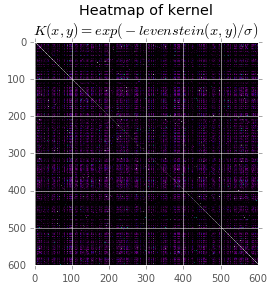

In [18]:
G = string_kernel(X_train, X_train)
plt.imshow(G, cmap='spectral')
plt.title("Heatmap of kernel\n" + r'$K(x, y) = exp(-levenstein(x, y)/\sigma) $')


## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащюей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке



* реализуем функцию train_string_SVC, аналогично train_SVR cо следующей модификацией: аргумент n_samples будет отвечть за количество объектов, которые мы возьмем для обучения модели.
* это скорее вынужденная мера, так как на всех словах обучение происходит очень долго

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
def train_string_SVC(data, target, n_samples=1000):
    
    X_train, X_test, y_train, y_test = train_test_split(data[:n_samples], target[:n_samples], test_size=0.33, random_state = RND_SEED)
    
    C_grid = {"C" : [ 10**j for j in np.arange(-4, 6)]}
    
    string_SVC = SVC(kernel="precomputed")
    svc_grid = GridSearchCV(string_SVC, C_grid, n_jobs = 3, cv = 3, verbose=5)
    
    svc_grid.fit(string_kernel(X_train, X_train), y_train)
    
    #preds = svc_grid.best_estimator_.predict(X_test.reshape((len(X_test),1)))
                            
    print("Best score on validation :", svc_grid.best_score_)
    print("\nResults of models:\n", svc_grid.grid_scores_)
    
    scores = [x[1] for x in svc_grid.grid_scores_]
    scores = np.array(scores).reshape(len(C_grid["C"]))
    
    plt.figure(figsize=(12, 6))
    plt.semilogx()
    plt.plot(C_grid["C"], scores)
    plt.xlabel('C')
    plt.ylabel('Score')
    
    plt.title("Score depending on C parameter with 3 folds")
    

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=0.0001 ........................................................
[CV] C=0.0001 ........................................................
[CV] C=0.0001 ........................................................
[CV] ............................... C=0.0001, score=0.549107 -   0.0s
[CV] C=0.001 .........................................................
[CV] ............................... C=0.0001, score=0.551570 -   0.0s
[CV] C=0.001 .........................................................
[CV] ............................... C=0.0001, score=0.551570 -   0.1s
[CV] ................................ C=0.001, score=0.549107 -   0.0s
[CV] ................................ C=0.001, score=0.551570 -   0.0s
[CV] C=0.001 .........................................................
[CV] C=0.01 ..........................................................
[CV] ................................ C=0.001, score=0.551570 -   0.0s
[CV] C=0.1 .....

[Parallel(n_jobs=3)]: Done  30 out of  30 | elapsed:    0.6s finished


Best score on validation : 0.801492537313

Results of models:
 [mean: 0.55075, std: 0.00116, params: {'C': 0.0001}, mean: 0.55075, std: 0.00116, params: {'C': 0.001}, mean: 0.55075, std: 0.00116, params: {'C': 0.01}, mean: 0.59552, std: 0.00625, params: {'C': 0.10000000000000001}, mean: 0.79104, std: 0.01788, params: {'C': 1}, mean: 0.80149, std: 0.02668, params: {'C': 10}, mean: 0.80149, std: 0.02668, params: {'C': 100}, mean: 0.80149, std: 0.02668, params: {'C': 1000}, mean: 0.80149, std: 0.02668, params: {'C': 10000}, mean: 0.80149, std: 0.02668, params: {'C': 100000}]


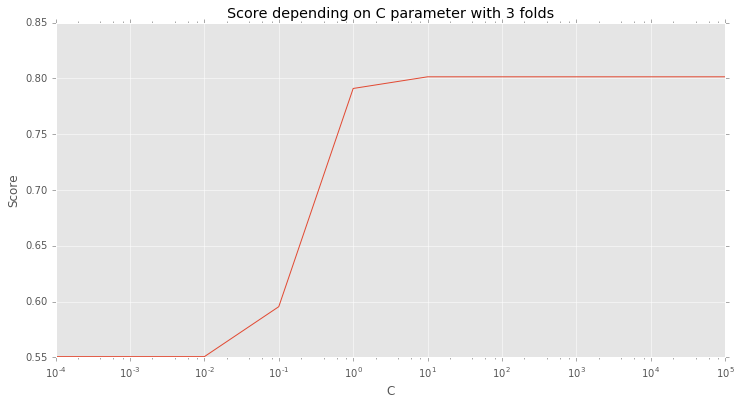

In [21]:
train_string_SVC(indexes, labels)


* Результаты можно интерпретировать следующим образом: при больших значениях штрафа С показатели становятся выше. Вероятно, это связано со спецификой данных(строки) (например символы, которые соответсвуют и английскому и испанскому языкам)